In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from Utils import utils


logo = utils.get_image("logo.png")
# plt.figure(figsize=(15, 15))
# plt.imshow(logo)
# plt.axis("off")

Px = logo.shape[0]/2
Py = logo.shape[1]/2
f = 500
d = 25
n = np.array([[0, 0, -1]])
K = np.array([[f, 0, Px], [0, f, Py], [0, 0, 1]])
theta = -np.arctan(40/25)
sin_th = np.sin(theta)
cos_th = np.cos(theta)
R = np.array([[cos_th, 0, -sin_th], [0, 1, 0], [sin_th, 0, cos_th]])
C = np.array([[40, 0 , 0]]).transpose()
t = -np.matmul(R,C)

H = np.matmul(np.matmul(K, R - np.matmul(t, n)/d), np.linalg.inv(K))

array([[ 3.12911374e-01,  0.00000000e+00,  2.01457261e+02],
       [-2.17087566e-01,  1.00000000e+00,  1.41297125e+02],
       [-1.69599661e-03,  0.00000000e+00,  2.10388379e+00]])

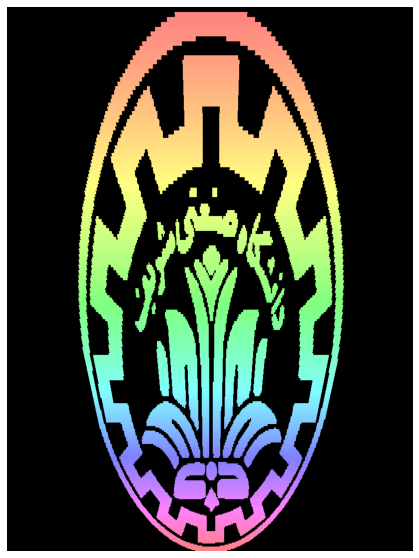

In [10]:
i = 0
j = 0
x = np.array([[i, j, 1]]).transpose()
x_p = np.matmul(H, x)
min_i = int(x_p[0]/x_p[2])
min_j = int(x_p[1]/x_p[2])
max_i = min_i
max_j = min_j
for i in range(logo.shape[0]):
    for j in range(logo.shape[1]):
        x = np.array([[i, j, 1]]).transpose()
        x_p = np.matmul(np.linalg.inv(H), x)
        i_p = int(x_p[0]/x_p[2])
        j_p = int(x_p[1]/x_p[2])
        min_i = min(min_i, i_p)
        min_j = min(min_j, j_p)
        max_i = max(max_i, i_p)
        max_j = max(max_j, j_p)

out = np.zeros((max_i - min_i + 1, max_j - min_j + 1, 3))

for i in range(out.shape[0]):
    for j in range(out.shape[1]):
        x = np.array([[i + min_i, j + min_j, 1]]).transpose()
        x_p = np.matmul(H, x)
        i_p = int(x_p[0]/x_p[2])
        j_p = int(x_p[1]/x_p[2])
        if logo.shape[0] > i_p > 0 and logo.shape[1] > j_p > 0:
            out[i, j, :] = logo[i_p, j_p, :]

plt.figure(figsize=(10, 10))
plt.imshow(out.astype(np.int16))
plt.axis("off")
plt.show()
